In [4]:
#Подключение библиотек

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.special import factorial


In [6]:
#Произведение мономов для Лагранжа и для оценки ошибки
def mul(x,dotes,k):
 P=1
 for i in range(len(dotes)):
  if(i!=k):
    P*=(x-dotes[i])
  return P
#Полином Лагранжа
def Lagrange_Formula(f,a,b,n,x):
 dx=(b-a)/n
 dotes=[(a+dx*i) for i in range(n)]
 sum=0
 for k in range(n):
  sum+=f(dotes[k])*mul(x,dotes,k)/mul(dotes[k],dotes,k)
 return sum
#Функция теоретической ошибки
def g(a,b,n,x):
  dx=(b-a)/n
  dotes=[(a+dx*i) for i in range(n)]
  sum=mul(x,dotes,-1)
  return sum/factorial(n)


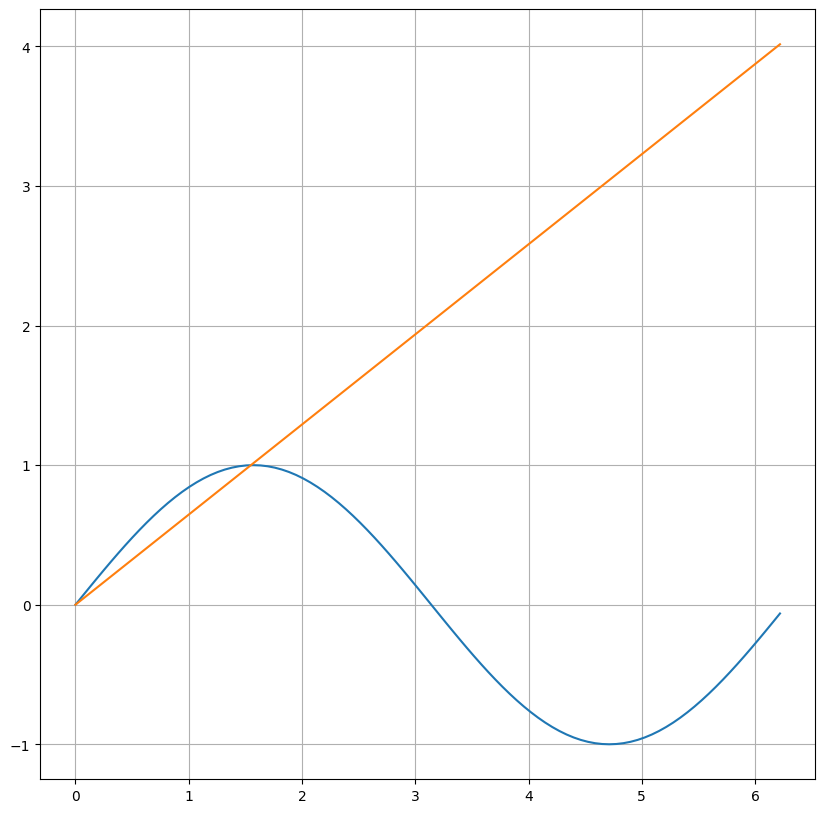

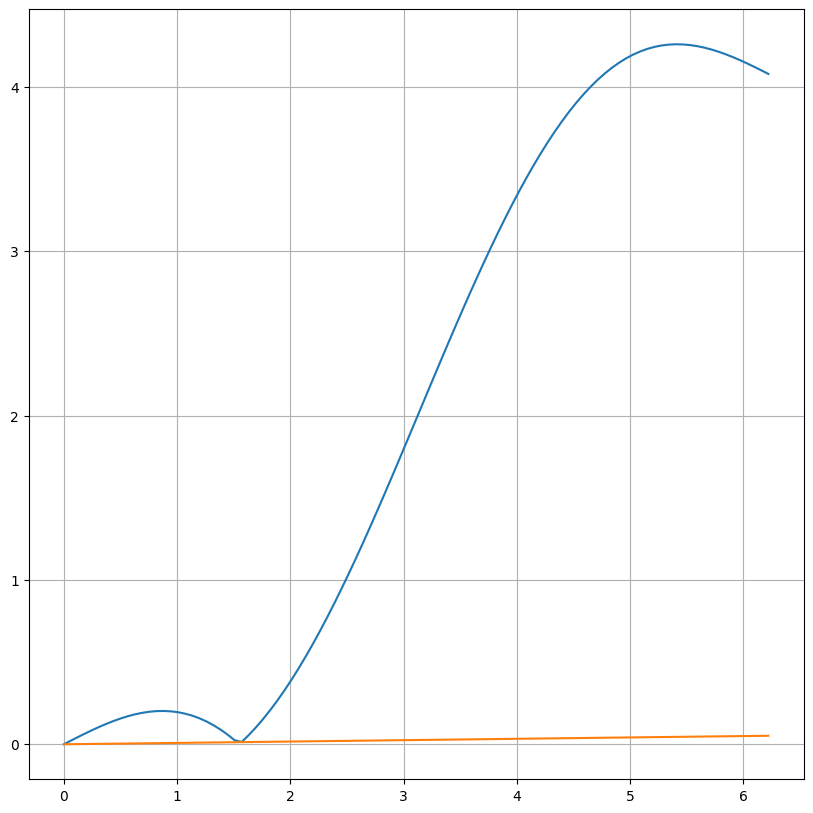

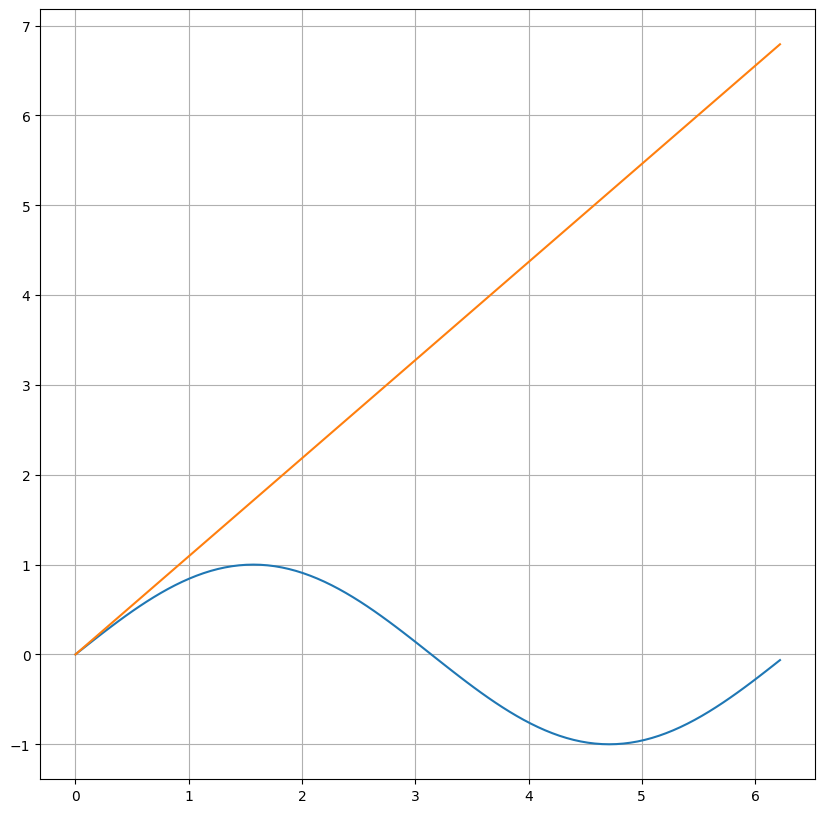

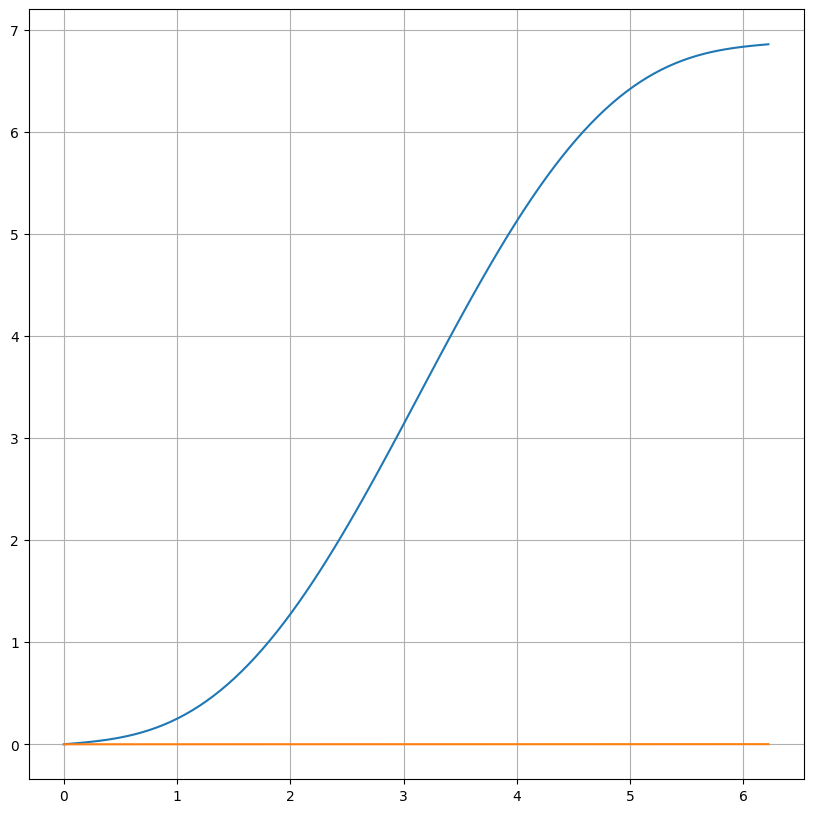

In [7]:

#Построение данных для графика на 5 узлах и на 7 узлах
h=2*np.pi/100
x=[i*h for i in range(100)]
y=[np.sin(i) for i in x]
y1=[Lagrange_Formula(np.sin,0,2*np.pi,5,i) for i in x]
g1=[abs(g(0,2*np.pi,5,i)) for i in x]
y2=[Lagrange_Formula(np.sin,0,2*np.pi,7,i) for i in x]
g2=[abs(g(0,2*np.pi,7,i)) for i in x]
#plt.plot(x,y,x,y1)
#Построение графиков
fig, ax = plt.subplots(figsize=(10, 10))
fig_1, ax_1 = plt.subplots(figsize=(10, 10))
ax.plot(x, y)
ax.plot(x, y1)
ax_1.plot(x,[abs(y[i]-y1[i]) for i in range(len(y))])
ax_1.plot(x,g1)
ax.grid()
ax_1.grid()
plt.show()
fig, ax = plt.subplots(figsize=(10, 10))
fig_1, ax_1 = plt.subplots(figsize=(10, 10))

ax.plot(x, y)
ax.plot(x, y2)
ax_1.plot(x,[abs(y[i]-y2[i]) for i in range(len(y))])
ax_1.plot(x,g2)
ax.grid()
ax_1.grid()

plt.show()




In [8]:
#For Chebychev parametrs
def Cheb_Formula(f,a,b,n,x):
  dx=(b-a)/n
  dotes=[(a-b)*np.cos((2*i+1)*np.pi/(2*n+2))+a+b for i in range(n)]
  sum=0
  for k in range(n):
    sum+=f(dotes[k])*mul(x,dotes,k)/mul(dotes[k],dotes,k)
  return sum
def g(a,b,n,x):
 dx=(b-a)/n
 dotes=[(a-b)*np.cos((2*i+1)*np.pi/(2*n+2))+a+b for i in range(n)]
 sum=mul(x,dotes,-1)
 return sum/factorial(n)

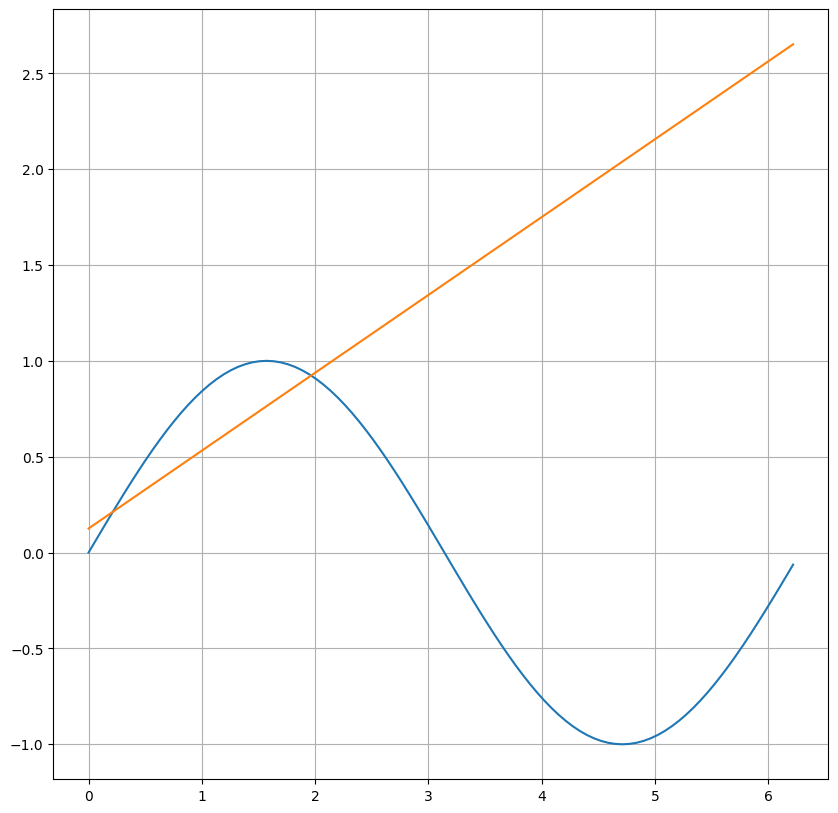

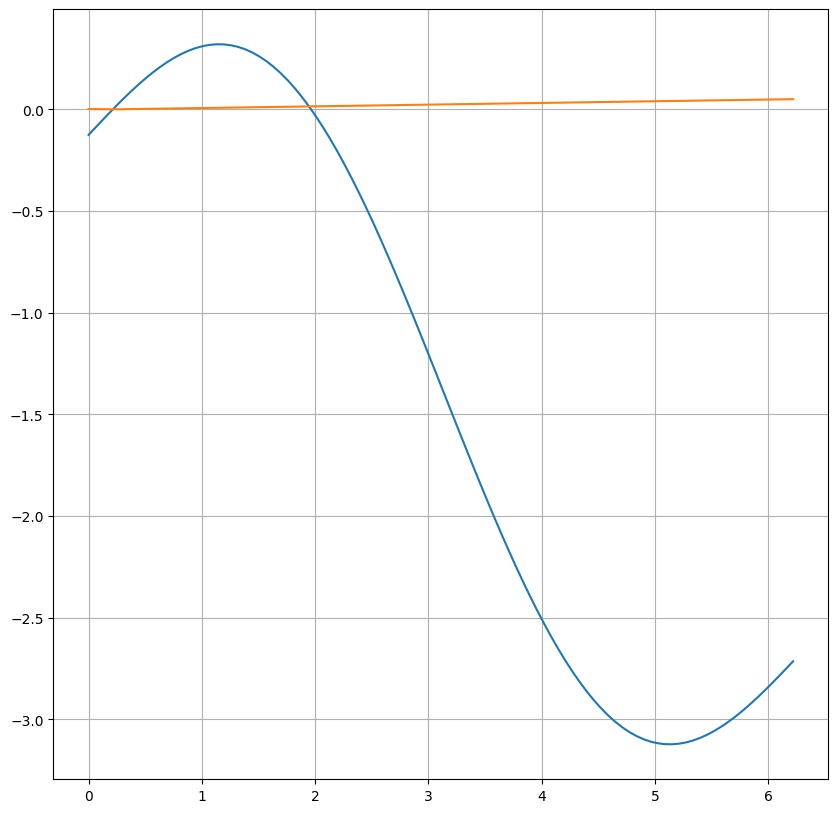

In [9]:
#Подготовка данных
h=2*np.pi/100
x=[i*h for i in range(100)]
y=[np.sin(i) for i in x]
y1=[Cheb_Formula(np.sin,0,2*np.pi,5,i) for i in x]
g1=[abs(g(0,2*np.pi,5,i)) for i in x]
#Построение и вывод графиков
fig, ax = plt.subplots(figsize=(10, 10))
fig_1, ax_1 = plt.subplots(figsize=(10, 10))

ax.plot(x, y)
ax.plot(x, y1)
ax_1.plot(x,[y[i]-y1[i] for i in range(len(y))])
ax_1.plot(x,g1)
ax.grid()
ax_1.grid()

plt.show()